In [20]:
import tensorflow as tf

In [21]:
pwd

'/home/chaudharyubuntu/Desktop/project/yolotensorflow2/script'

In [22]:
hel='/home/chaudharyubuntu/Desktop/Github upload/ComputerVision_Model/tfrecord/train.tfrecord'
raw_dataset = tf.data.TFRecordDataset(hel)
raw_dataset

<TFRecordDatasetV2 shapes: (), types: tf.string>

In [23]:
for raw_record in raw_dataset.take(2):
    print(repr(raw_record))

<tf.Tensor: id=171, shape=(), dtype=string, numpy=b'\n\xe1p\n!\n\x18image/object/class/label\x12\x05\x1a\x03\n\x01\x01\n\x84p\n\rimage/encoded\x12\xf2o\n\xefo\n\xeco\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01\x19\x01\x02\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x

In [24]:
# Create a description of the features.
hel='/home/chaudharyubuntu/Desktop/project/tfrecord/how_to_convert_csv_to_tfrecord/images.tfrecords'
raw_image_dataset = tf.data.TFRecordDataset(hel)


feature_description = {
    
            #'image/width': tf.io.FixedLenFeature([], tf.int64),
            #'image/height': tf.io.FixedLenFeature([], tf.int64),
            'image/filename': tf.io.FixedLenFeature([], tf.string),
            #'image/source_id': tf.io.FixedLenFeature([], tf.string),
            'image/encoded': tf.io.FixedLenFeature([], tf.string),
            #'image/format': tf.io.FixedLenFeature([], tf.string),
            #'image/object/bbox/xmin': tf.io.VarLenFeature(tf.float32),
            #'image/object/bbox/ymin': tf.io.VarLenFeature(tf.float32),
            #'image/object/bbox/xmax': tf.io.VarLenFeature(tf.float32),
            #'image/object/bbox/ymax': tf.io.VarLenFeature(tf.float32),
            #'image/object/class/text': tf.io.VarLenFeature(tf.string),
            'image/object/class/label': tf.io.VarLenFeature(tf.int64)
}
# Parse the input tf.Example proto using the dictionary above.
def _parse_image_function(example_proto):
  
  return tf.io.parse_single_example(example_proto, feature_description)

parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
parsed_image_dataset

def _parse_function(example_proto):
  # Parse the input `tf.Example` proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, feature_description)

In [25]:
parsed_dataset = raw_dataset.map(_parse_function)
parsed_dataset

<MapDataset shapes: {image/object/class/label: (None,), image/encoded: (), image/filename: ()}, types: {image/object/class/label: tf.int64, image/encoded: tf.string, image/filename: tf.string}>

(416, 416, 3)
tf.Tensor(
[[[0.8156863  0.8235294  0.8745098 ]
  [0.8156863  0.8235294  0.8745098 ]
  [0.8156863  0.8235294  0.8745098 ]
  ...
  [0.79607844 0.7882353  0.87058824]
  [0.7916102  0.7904694  0.87058824]
  [0.7882353  0.7921569  0.87058824]]

 [[0.8156863  0.8235294  0.8745098 ]
  [0.8156863  0.8235294  0.8745098 ]
  [0.8156863  0.8235294  0.8745098 ]
  ...
  [0.79406583 0.7862227  0.86857563]
  [0.7895976  0.7884568  0.86857563]
  [0.7862227  0.79014426 0.86857563]]

 [[0.8156863  0.8235294  0.8745098 ]
  [0.8156863  0.8235294  0.8745098 ]
  [0.8156863  0.8235294  0.8745098 ]
  ...
  [0.7921569  0.78431374 0.8666667 ]
  [0.7876886  0.78654784 0.8666667 ]
  [0.78431374 0.7882353  0.8666667 ]]

 ...

 [[0.2229388  0.25431135 0.4464682 ]
  [0.22720453 0.25857708 0.45073396]
  [0.23840287 0.26918155 0.46252617]
  ...
  [0.4327717  0.23441644 0.24740617]
  [0.4537885  0.24549529 0.24651092]
  [0.46792483 0.25320026 0.2460971 ]]

 [[0.25154203 0.28291458 0.47507146]
  [0.2617556

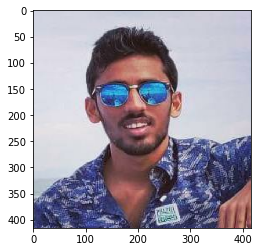

In [26]:
import matplotlib.pyplot as plt
for parsed_record in parsed_dataset.take(1):
    #print(repr(parsed_record))
        #image_raw = feature_description['image/encoded'].numpy()
        #display.display(display.Image(data=image_raw))
        x_train = tf.image.decode_jpeg(parsed_record['image/encoded'], channels=3)
        x_train = tf.image.resize(x_train, (416, 416))
        
        x_train = x_train / 255
    #image_raw = feature_description['image/encoded'].numpy()
        print(x_train.shape)
        print(x_train)
        #display.Image(data=x_train)
        imgplot = plt.imshow(x_train)

In [ ]:
#tf.sparse.to_dense(tf.sparse.reorder())

class GenerateTFRecord:

    def convert_image(self, img_path):
        label = self._get_label_with_filename(img_path)
        img_shape = mpimg.imread(img_path).shape
        filename = os.path.basename(img_path)

        # Read image data in terms of bytes
        with tf.gfile.FastGFile(img_path, 'rb') as fid:
            image_data = fid.read()

        example = tf.train.Example(features = tf.train.Features(feature = {
            'filename': tf.train.Feature(bytes_list = tf.train.BytesList(value = [filename.encode('utf-8')])),
            'rows': tf.train.Feature(int64_list = tf.train.Int64List(value = [img_shape[0]])),
            'cols': tf.train.Feature(int64_list = tf.train.Int64List(value = [img_shape[1]])),
            'channels': tf.train.Feature(int64_list = tf.train.Int64List(value = [img_shape[2]])),
            'image': tf.train.Feature(bytes_list = tf.train.BytesList(value = [image_data])),
            'label': tf.train.Feature(int64_list = tf.train.Int64List(value = [label])),
        }))
        return example